In [63]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [64]:
df = pd.read_csv('ACMETelephoneABT.csv')

In [65]:
df.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1000004,26,crafts,town,yes,true,6,1,1812,false,...,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0,false
1,1000012,36,,,yes,true,9,4,544,true,...,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0,false
2,1000034,74,professional,town,yes,false,7,2,138,true,...,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3,false
3,1000063,30,,suburban,no,false,6,3,122,true,...,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0,false
4,1000085,32,,town,yes,false,7,8,10,true,...,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0,false


In [66]:
df.shape

(10000, 33)

In [67]:
df['churn'].value_counts()

 false    5000
 true     5000
Name: churn, dtype: int64

# As we see, we have a perfectly balanced dataset, nothing further needs to be done to balance. 

# Customer adds to value to the dataframe, Churn is the target variable, hence dropping

In [68]:
#Dropping Customer column, as there is no value addition
df.drop(["customer","churn"],axis=1,inplace=True)

In [69]:
df.columns

Index([' age', ' occupation', ' regionType', 'marriageStatus', ' children',
       ' income', 'numHandsets', 'handsetAge', 'smartPhone',
       'currentHandsetPrice', ' creditRating', 'homeOwner', ' creditCard',
       'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins',
       'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct',
       'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio',
       'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime',
       'lastMonthCustomerCareCalls', 'numRetentionCalls',
       'numRetentionOffersAccepted', 'newFrequentNumbers'],
      dtype='object')

# As we see - there are column names with white spaces, stripping the white space below

In [8]:
df.columns=df.columns.str.strip()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,30.318400,22.158676,0.000000,0.000000,34.000000,48.000000,98.000000
income,10000.0,4.293600,3.139902,0.000000,0.000000,5.000000,7.000000,9.000000
numHandsets,10000.0,1.804500,1.345088,1.000000,1.000000,1.000000,2.000000,21.000000
handsetAge,10000.0,390.171700,257.076656,-5.000000,210.000000,339.000000,525.000000,1812.000000
currentHandsetPrice,10000.0,35.730696,57.072922,0.000000,0.000000,0.000000,59.990000,499.990000
avgBill,10000.0,58.927600,43.889815,0.000000,33.327500,49.205000,71.762500,584.230000
avgMins,10000.0,521.170645,540.435285,0.000000,150.627500,359.625000,709.187500,6336.250000
avgrecurringCharge,10000.0,46.236537,23.964960,0.000000,30.000000,44.990000,59.990000,337.980000
avgOverBundleMins,10000.0,42.392670,106.374374,0.000000,0.000000,3.000000,43.750000,4320.750000
avgRoamCalls,10000.0,1.186048,6.048811,0.000000,0.000000,0.000000,0.260000,177.990000


# From the above we can see, outliers are present 
Income shows 0 in the 25th percentile.
Age, handsetAge, AvgBill, lastMonthCustomerCareCalls - we observe outliers

Before treating the outliers, we see the data has blank fields, lets trim the strings and treat them.

In [10]:
trimStrings = lambda x: x.strip() if type(x) is str else x
df =df.applymap(trimStrings)

In [11]:
def getMissingColumns(df):
    'Method to get the dictionary with columns having missing values and count of missing values'
    na_columns = {}
    for col in df.columns:
        missed = df.shape[0] - df[col].dropna().shape[0]
        blanks = 0
        
        if(df[col].dtype == 'O'):
            blanks = len(df[df[col] == ''])
            
        if (missed > 0 or blanks>0):
            na_columns[col] = missed + blanks

    return na_columns

In [12]:
getMissingColumns(df)

{'occupation': 7400, 'regionType': 4776}

# Based on the null data - RegionType and Occupation is not a good data to be used for classification due to nulls, hence dropping

In [13]:
df.drop(["regionType","occupation"],axis=1,inplace=True)

In [14]:
df.head()

,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
0,26,yes,true,6,1,1812,false,0.00,C,true,...,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0
1,36,yes,true,9,4,544,true,79.99,A,false,...,4.00,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0
2,74,yes,false,7,2,138,true,29.99,A,false,...,0.00,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3
3,30,no,false,6,3,122,true,9.99,C,false,...,9.00,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0
4,32,yes,false,7,8,10,true,129.99,A,false,...,59.33,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0


# Data looks more cleaner now

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,30.318400,22.158676,0.000000,0.000000,34.000000,48.000000,98.000000
income,10000.0,4.293600,3.139902,0.000000,0.000000,5.000000,7.000000,9.000000
numHandsets,10000.0,1.804500,1.345088,1.000000,1.000000,1.000000,2.000000,21.000000
handsetAge,10000.0,390.171700,257.076656,-5.000000,210.000000,339.000000,525.000000,1812.000000
currentHandsetPrice,10000.0,35.730696,57.072922,0.000000,0.000000,0.000000,59.990000,499.990000
avgBill,10000.0,58.927600,43.889815,0.000000,33.327500,49.205000,71.762500,584.230000
avgMins,10000.0,521.170645,540.435285,0.000000,150.627500,359.625000,709.187500,6336.250000
avgrecurringCharge,10000.0,46.236537,23.964960,0.000000,30.000000,44.990000,59.990000,337.980000
avgOverBundleMins,10000.0,42.392670,106.374374,0.000000,0.000000,3.000000,43.750000,4320.750000
avgRoamCalls,10000.0,1.186048,6.048811,0.000000,0.000000,0.000000,0.260000,177.990000


In [16]:
df['marriageStatus'].value_counts()

unknown    3920
yes        3594
no         2486
Name: marriageStatus, dtype: int64

In [17]:
df['income'].value_counts()

0    2555
6    1950
7    1159
9    1037
5     807
4     751
3     570
8     520
1     421
2     230
Name: income, dtype: int64

In [18]:
# hence income is being taken as categorical

In [19]:
df['numHandsets'].value_counts()

1     5674
2     2451
3     1034
4      426
5      191
6       91
7       53
8       38
9       10
10      10
13       5
12       5
11       5
15       2
17       1
21       1
14       1
16       1
19       1
Name: numHandsets, dtype: int64

In [20]:
df["newFrequentNumbers"].value_counts()

0    9007
1     350
2     329
3     314
Name: newFrequentNumbers, dtype: int64

In [21]:
df["numRetentionOffersAccepted"].value_counts()

0    9806
1     186
2       4
3       3
4       1
Name: numRetentionOffersAccepted, dtype: int64

In [22]:
df["numRetentionCalls"].value_counts()

0    9588
1     384
2      24
4       2
3       2
Name: numRetentionCalls, dtype: int64

In [23]:
df["lastMonthCustomerCareCalls"].value_counts()

0.00      5621
0.33       725
0.67       530
1.00       352
1.33       313
1.67       216
2.00       210
2.33       175
2.67       155
3.00       141
3.33       115
3.67       114
4.00       111
5.00        87
4.67        83
4.33        73
5.33        73
6.33        62
6.00        53
5.67        47
6.67        43
8.33        40
7.33        38
7.67        36
7.00        32
8.00        32
8.67        30
9.67        28
9.00        26
11.33       22
          ... 
48.33        1
43.67        1
27.00        1
47.00        1
85.67        1
36.67        1
23.00        1
38.67        1
31.33        1
30.67        1
57.00        1
172.33       1
32.33        1
33.33        1
78.67        1
35.00        1
27.67        1
73.00        1
36.33        1
41.33        1
55.67        1
49.33        1
365.67       1
42.00        1
30.00        1
26.67        1
31.67        1
24.67        1
23.33        1
25.67        1
Name: lastMonthCustomerCareCalls, Length: 109, dtype: int64

In [24]:
# Based on the above, segregating Continious and Categorical

In [24]:
list_cont = ["age", "handsetAge", "currentHandsetPrice","avgBill","avgMins","avgrecurringCharge","avgOverBundleMins","avgRoamCalls","callMinutesChangePct","billAmountChangePct","avgReceivedMins","avgOutCalls","avgInCalls","peakOffPeakRatio","peakOffPeakRatioChangePct","avgDroppedCalls","lifeTime","lastMonthCustomerCareCalls"]
list_cat =["income","numHandsets","marriageStatus","children","smartPhone","creditRating","homeOwner","creditCard","numRetentionCalls","numRetentionOffersAccepted","newFrequentNumbers"]

In [25]:
#Treat the Continuous values, fill NA with the median value

for variable in list_cont:
    df[variable].fillna(df[variable].median(), inplace = True)

In [26]:
# Apply label encoder for Categorical Variables.

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in list_cat:
    df[i] = labelencoder.fit_transform(df[i])

In [27]:
df.head()

,age,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
0,26,2,1,6,0,1812,0,0.00,2,1,...,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,0,0,0
1,36,2,1,9,3,544,1,79.99,0,0,...,4.00,1.67,5.586826,7.499560,0.00,53,0.00,0,0,0
2,74,2,0,7,1,138,1,29.99,0,0,...,0.00,0.33,0.500000,-5.940493,4.33,58,0.00,0,0,3
3,30,0,0,6,2,122,1,9.99,2,0,...,9.00,4.67,8.629661,-0.066485,5.33,50,0.33,0,0,0
4,32,2,0,7,7,10,1,129.99,0,0,...,59.33,23.00,14.042685,-7.208502,14.67,56,0.00,0,0,0


In [29]:
# Create a Continuious Variable Dataset, to view KDE and later apply z-score

df_cont = df.drop(["income","numHandsets","marriageStatus","children","smartPhone","creditRating","homeOwner","creditCard","numRetentionCalls","numRetentionOffersAccepted","newFrequentNumbers"],axis=1)

In [30]:
df_cont.shape

(10000, 18)

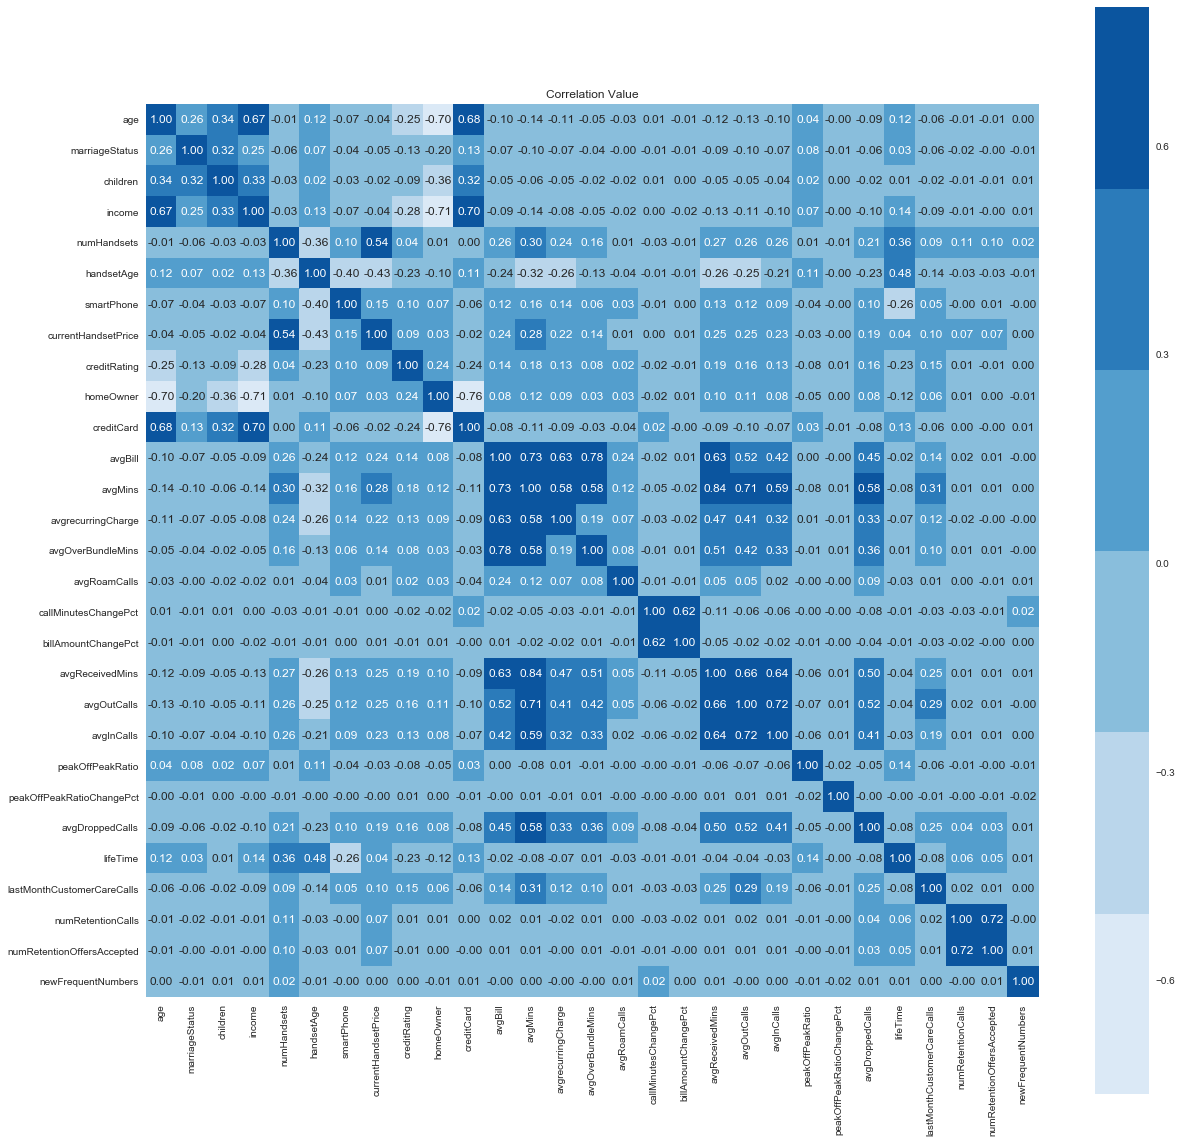

In [31]:
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()
plt.figure(figsize=(20,20))
# my_cmap = sns.light_palette("Violet", as_cmap=True)
# my_cmap = ListedColormap(sns.husl_palette(7))
my_cmap = ListedColormap(sns.mpl_palette("Blues"))
ax = sns.heatmap(df.corr(), vmax=.8, fmt='.2f', annot=True, square=True, cmap=my_cmap)
plt.title('Correlation Value')
plt.show()

# Drop high multicollinearity columns

From the above we can see the following have high co-relation

Income-CreditCard

AvgMins-AvgBill-AvgOverBundleMins

AvgReceiveMins - AvgMins

NumberOfRetentionOffersAccepted - NumberOfRetentionCalls



In [28]:
df.drop(["income","avgBill","avgReceivedMins","numRetentionOffersAccepted"],axis=1,inplace=True)

In [29]:
df2 = df.copy()
df2 = df.drop(["numHandsets","marriageStatus","children","smartPhone","creditRating","homeOwner","creditCard","numRetentionCalls","newFrequentNumbers"],axis=1)

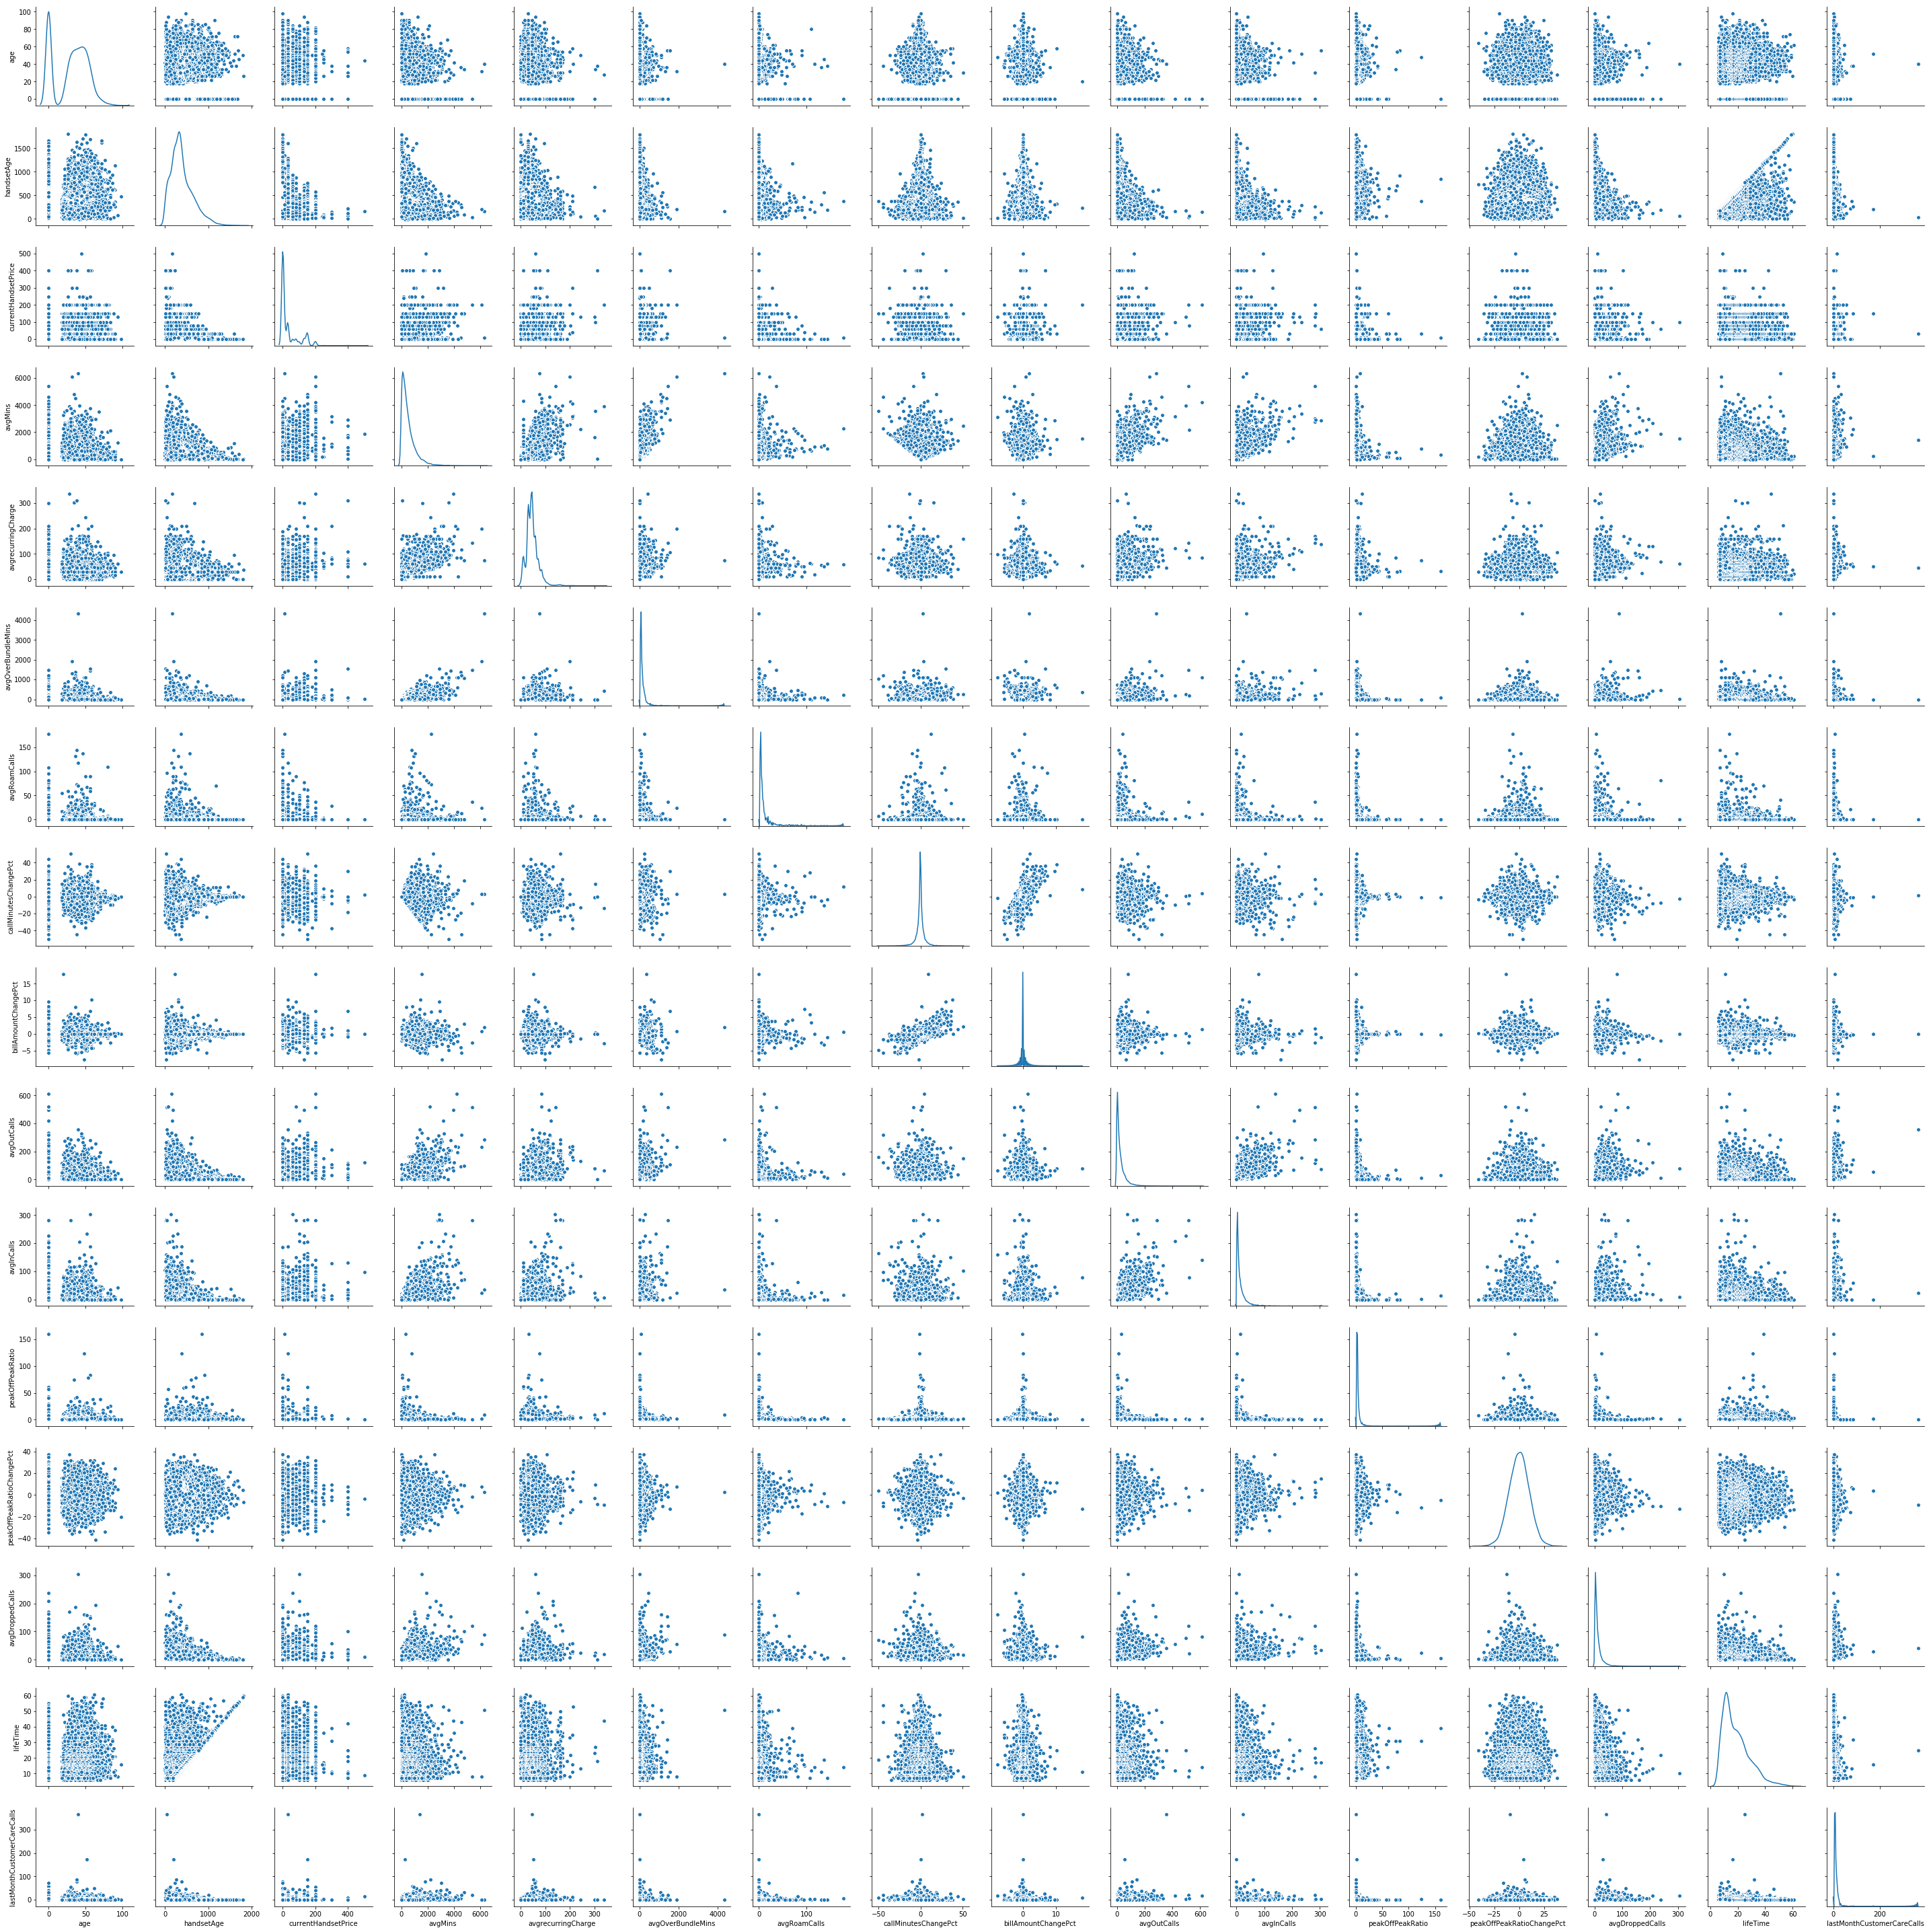

In [30]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [70]:
#Apply zscore 
# df_scaled = df2.apply(zscore)
df_scaled = df2.copy()

In [71]:
model = KMeans(n_clusters = 3)

In [72]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.758691e+09
1,2,1.863270e+09
2,3,1.307679e+09
3,4,9.771343e+08
4,5,7.724833e+08
5,6,6.615039e+08
6,7,5.974381e+08
7,8,5.363337e+08
8,9,4.822309e+08
9,10,4.418460e+08


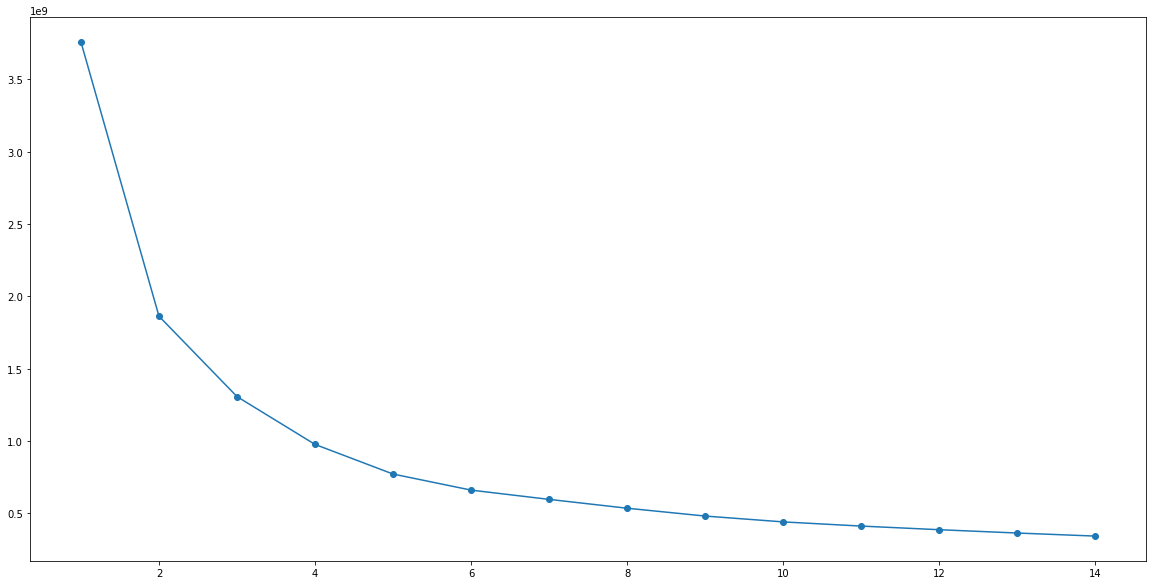

In [73]:
# Elbow plot

plt.figure(figsize=(20,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

In [74]:
# From the above we take n_clusters as 3

In [80]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=42, algorithm='full')

In [81]:
kmeans.fit(df_scaled)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [82]:
centroids = kmeans.cluster_centers_

In [83]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [84]:
centroid_df

,age,handsetAge,currentHandsetPrice,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls
0,26.479214,275.051064,51.660399,828.124933,55.692651,66.785002,1.757951,-0.265423,0.019411,40.266736,13.091804,1.797744,-0.133265,15.768023,17.383961,2.767031
1,32.690631,463.600763,23.829965,216.596805,37.999577,13.155112,0.715483,-0.187259,-0.009887,10.770724,2.880736,2.504361,-0.009790,4.763768,19.684587,0.687864
2,25.477204,223.066869,75.479407,2006.140836,81.034924,208.498982,3.026900,-1.246677,-0.050286,93.249119,38.865714,1.429835,0.001806,33.133298,17.474164,6.985198


In [85]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [86]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
churn_df_labeled = df2.join(df_labels)

In [87]:
df_analysis = (churn_df_labeled.groupby(['labels'] , axis=0)).head(1599)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
df_analysis

,age,handsetAge,currentHandsetPrice,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,labels
0,26,1812,0.00,7.50,38.00,0.00,0.00,-0.030,0.0000,0.33,0.00,0.362398,-6.330770,0.00,60,0.00,1
1,36,544,79.99,24.25,34.98,0.00,0.00,0.395,-0.0062,4.00,1.67,5.586826,7.499560,0.00,53,0.00,1
2,74,138,29.99,45.50,16.99,14.00,0.00,-0.310,-0.0832,0.00,0.33,0.500000,-5.940493,4.33,58,0.00,1
3,30,122,9.99,332.75,75.00,0.00,0.00,-0.615,-0.1084,9.00,4.67,8.629661,-0.066485,5.33,50,0.33,1
4,32,10,129.99,1348.25,75.00,4.75,1.92,-3.305,0.4930,59.33,23.00,14.042685,-7.208502,14.67,56,0.00,0
5,40,161,9.99,537.50,75.00,0.00,0.00,1.170,-0.0122,31.33,7.00,5.396667,-17.093421,9.33,54,0.00,0
6,52,1619,0.00,225.00,29.99,0.00,0.00,1.480,-0.0502,3.00,0.00,0.788806,-0.583749,0.00,54,0.00,1
7,32,10,29.99,797.25,60.00,43.25,0.00,-0.185,-0.1878,22.00,3.33,3.367766,-11.545658,11.67,49,0.33,0
8,40,124,149.99,3209.75,212.99,0.00,0.00,-8.435,-0.4238,141.67,28.00,4.309086,21.520380,30.33,53,4.67,2
9,42,517,29.99,112.50,31.98,0.00,0.00,-0.050,-0.0058,6.00,0.00,5.714286,9.369332,1.67,49,0.00,1


In [88]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0.92,'3D plot of KMeans Clustering')

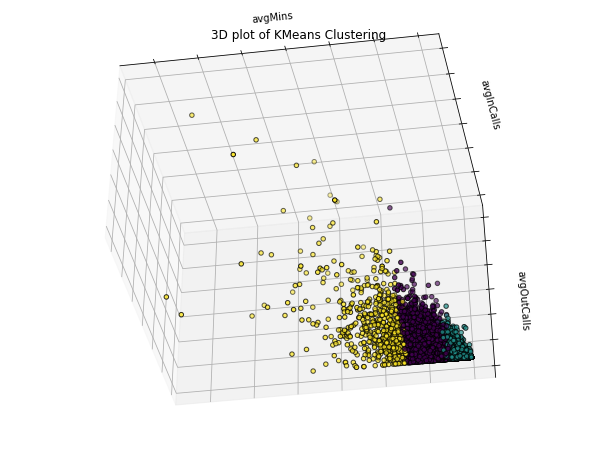

In [91]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=-45, azim=100)
kmeans.fit(df_scaled)
labels = kmeans.labels_

ax.scatter(df_scaled.iloc[:, 3], df_scaled.iloc[:, 9], df_scaled.iloc[:, 10],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('avgMins')
ax.set_ylabel('avgInCalls')
ax.set_zlabel('avgOutCalls')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5,0.92,'3D plot of KMeans Clustering')

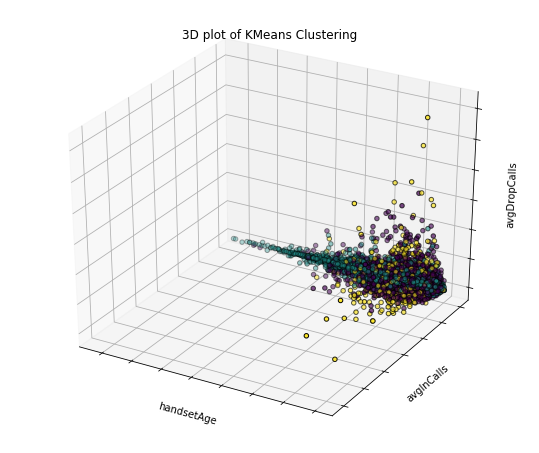

In [93]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[.80, .75, .90, 1], elev=30, azim=120)
kmeans.fit(df_scaled)
labels = kmeans.labels_

ax.scatter(df_scaled.iloc[:, 1], df_scaled.iloc[:, 9], df_scaled.iloc[:, 13],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('handsetAge')
ax.set_ylabel('avgInCalls')
ax.set_zlabel('avgDropCalls')
ax.set_title('3D plot of KMeans Clustering')

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[.80, .75, .90, 1], elev=60, azim=120)
kmeans.fit(df_scaled)
labels = kmeans.labels_

ax.scatter(df_scaled.iloc[:, 5], df_scaled.iloc[:, 9], df_scaled.iloc[:, 4],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('avgOverBundleMins')
ax.set_ylabel('avgInCalls')
ax.set_zlabel('handsetAge')

ax.set_title('3D plot of KMeans Clustering')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a33758e80>,
      dtype=object)

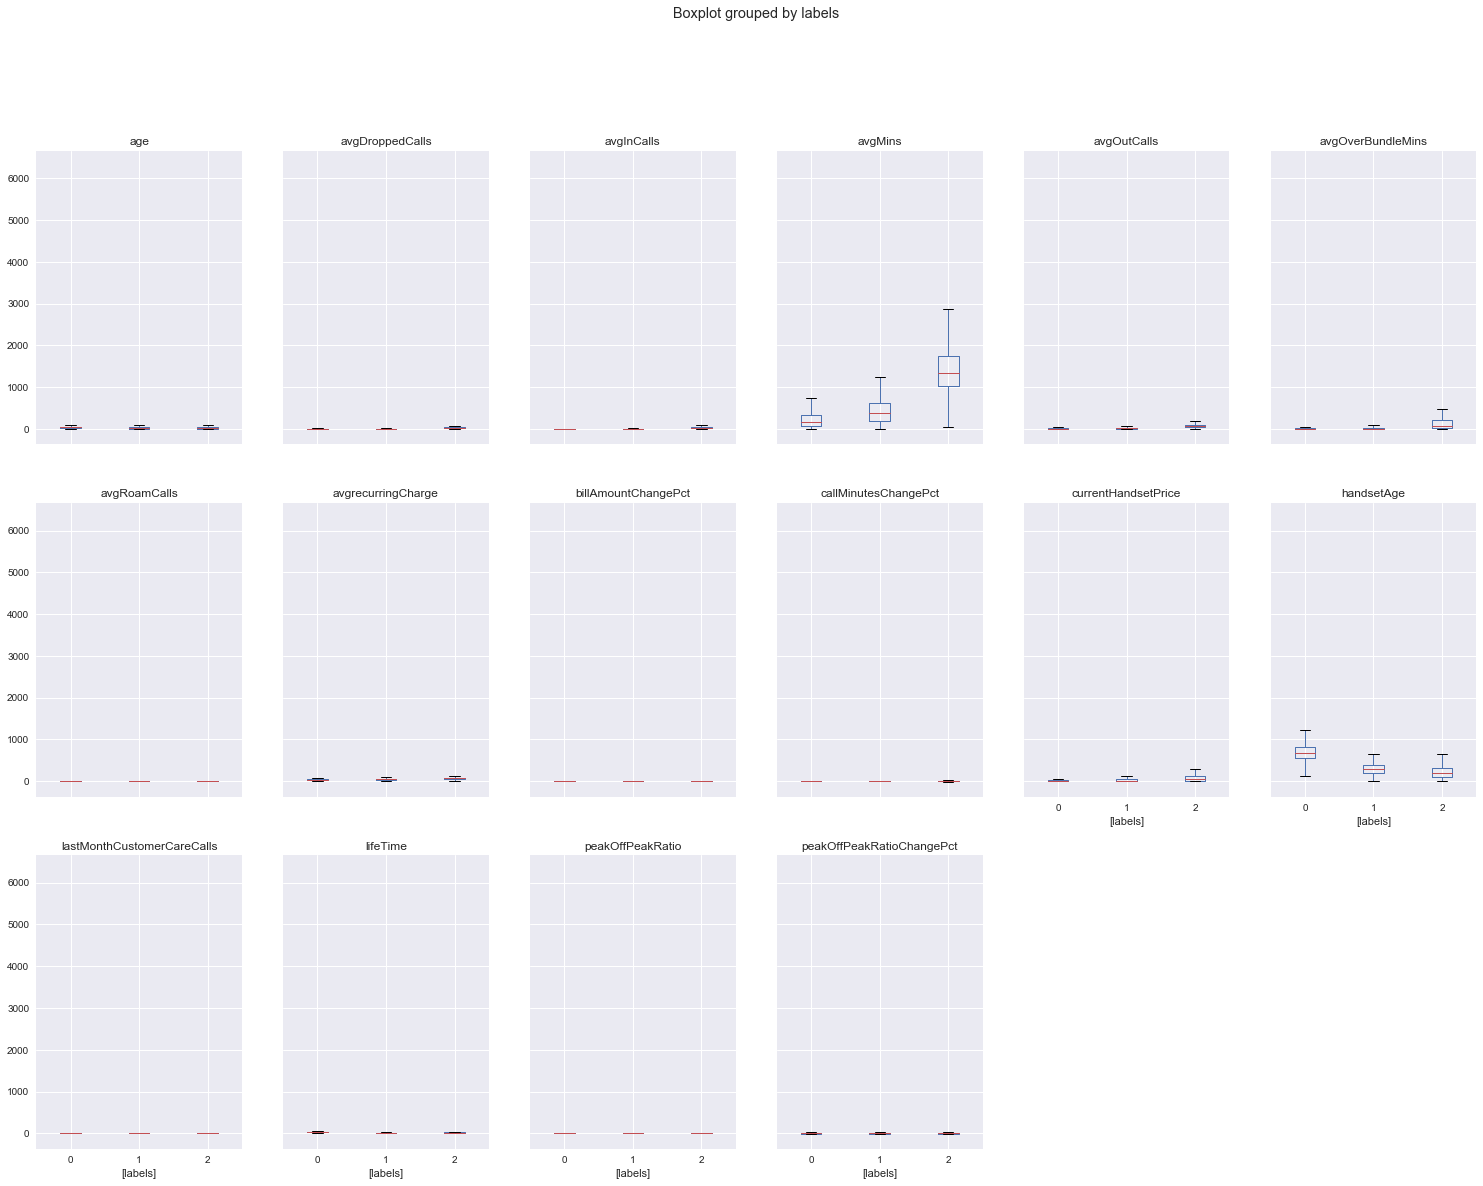

In [52]:
import matplotlib.pylab as plt

bxplt = churn_df_labeled.boxplot(by = 'labels',  layout=(4,6), figsize=(25, 25))
bxplt

# We can see that Avgerage Minutes, Handset Age, and Average Over Bundle Minutes are relatively good indicators to cluster the customers for clustering the customers.

# Also, looking at the dataset, Number of Retention Calls also has a direct relation with Churn